# IMPORTACION DE LAS LIBRERIAS 


Para trabajar con esta parte del proyecto es necesario importar algunas librerías para manejar mejor los datos proporcionados. En este notebook, se enfocará en explorar y analizar las relaciones existentes entre las variables: 'release_year', 'gender_processed', 'Country'. El objetivo principal es observar cómo el paso del tiempo (indicado por la variable 'release_year') afecta a los géneros (indicado por la variable 'gender_type'). Por otro lado, ver cuales son los géneros que mas triunfan en cada pais (indicado por la variable'Country')

In [2]:
import pandas as pd
import nltk
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import random 
import plotly.graph_objects as go
import matplotlib.colors as mcolors

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Analisis de Tiempo y Género.

Para llevar a cabo este análisis, se deben tener en cuenta varios pasos clave:

1) **Limpieza y Preparación de Datos:** Primero, se debe asegurar que el conjunto de datos esté limpio y listo para el análisis. Esto incluye eliminar las filas con valores nulos, cero o menores de 2000 en la variable 'release_year', ya que esto podría perjudicar el análisis, así como limpiar las variables 'gender_type' y 'Country' para que contengan datos válidos y no sucios.

2) **Encolumnar los Géneros:** A partir de la columna 'gender_type' y 'Country' , se deben agregar columnas al dataset para cada género y pais, indicando con 1 si la película pertenece y con 0 si no pertenece.

3) **Estudio de Decisión:** Se explicará el origen de las decisiones tomadas durante el proceso de análisis.

4) **Exploración y visualización de Datos:** Para complementar el análisis cuantitativo, se crearán visualizaciones como histogramas que permitan observar la relación entre el año y el género más repetido, de una forma más intuitiva. Estas visualizaciones pueden ayudar a identificar patrones, tendencias o agrupaciones específicas dentro de los datos.

6) **Interpretación y Conclusiones:** Finalmente, se interpretarán los resultados del análisis para extraer conclusiones sobre la relación entre el año de salida de una película y el género más repetido. Se considerará en qué año estrenar una película y qué género podría interesar producir. También se discutirán las limitaciones del análisis y posibles pasos futuros para una investigación más profunda.

# 0) Visualización de Datos.

Primero, se llamará y leerá el dataset 'df' para facilitar el trabajo. 

In [3]:
df = pd.read_csv("./all_streaming.csv")
df

,movie_or_serie,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description,channel_streaming
0,Movie,ricky velez: here's everything,uninformed director,uninformed cast,uninformed country,"October 24, 2021",2021,NaN,"comedy, stand up",​Comedian Ricky Velez bares it all with his ho...,hulu-movies-and-tv-shows
1,Movie,silent night,uninformed director,uninformed cast,uninformed country,"October 23, 2021",2020,94 min,"crime, drama, thriller","Mark, a low end South London hitman recently r...",hulu-movies-and-tv-shows
2,Movie,the marksman,uninformed director,uninformed cast,uninformed country,"October 23, 2021",2021,108 min,"action, thriller",A hardened Arizona rancher tries to protect an...,hulu-movies-and-tv-shows
3,Movie,gaia,uninformed director,uninformed cast,uninformed country,"October 22, 2021",2021,97 min,horror,A forest ranger and two survivalists with a cu...,hulu-movies-and-tv-shows
4,Movie,settlers,uninformed director,uninformed cast,uninformed country,"October 22, 2021",2021,104 min,"science fiction, thriller",Mankind's earliest settlers on the Martian fro...,hulu-movies-and-tv-shows
...,...,...,...,...,...,...,...,...,...,...,...
22993,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,158 min,"cult ,, dramas, thrillers","A political cartoonist, a crime reporter and a...",netflix-shows
22994,TV Show,zombie dumb,uninformed director,uninformed cast,uninformed country,"July 1, 2019",2018,2 Seasons,"kids' ,, korean ,, , comedies","While living alone in a spooky town, a young g...",netflix-shows
22995,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88 min,"comedies, horror ,",Looking to survive in a world taken over by zo...,netflix-shows
22996,Movie,zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88 min,"children , family ,, comedies","Dragged from civilian life, a former superhero...",netflix-shows


# 1) Limpieza y Preparación de Datos.


A continuación, se procederá con el primer paso clave: limpiar la columna 'gender_type' y 'country', debido a que se encontraron muchos datos sucios.

1. **Espacios al principio:** Se corregirán los datos que tienen espacios al principio, lo cual ocurre frecuentemente por errores de escritura.

2. **Espacios al final:** Al igual que los espacios al principio, se limpiarán los datos con espacios al final.

3. **Fallos con 'and':** Los datos separados por 'and' se limpiarán para evitar interferencias durante la limpieza, ya que algunos datos combinan dos aspectos en uno solo.
 

In [4]:
generos_fila = df['gender_type']
aux = []
for fila in generos_fila:
    aux.append([gender[1:] if gender.startswith(" ") else gender for gender in fila])
generos_fila = aux
aux = []
for fila in generos_fila:
    aux.append([gender[:-1] if gender.endswith(" ") else gender for gender in fila])
generos_fila = aux 
aux = []
for fila in generos_fila:
    aux.append([gender[4:] if gender.startswith("and ") else gender for gender in fila])
generos_fila = aux
generos_fila_lim = [[elemento for elemento in sublista if elemento] for sublista in generos_fila]

In [5]:
paises_fila = df['country']
aux = []
for fila in paises_fila:
    aux.append([gender[1:] if gender.startswith(" ") else gender for gender in fila])
paises_fila = aux
aux = []
for fila in paises_fila:
    aux.append([gender[:-1] if gender.endswith(" ") else gender for gender in fila])
paises_fila = aux 
aux = []
for fila in paises_fila:
    aux.append([gender[4:] if gender.startswith("and ") else gender for gender in fila])
paises_fila = aux
paisess_fila_lim = [[elemento for elemento in sublista if elemento] for sublista in paises_fila]

Después de limpiar las columnas, se eliminarán las películas producidas antes del año 2000, ya que el estudio se enfoca en un periodo más actual y estos datos antiguos no son significativos. Luego, se identificarán y corregirán las variaciones en la escritura de los datos, ya sea por plurales, contracciones o caracteres adicionales irrelevantes.

In [6]:

df = df[df['release_year'] >= 2000]
df = df[df['release_year'].notnull() & (df['release_year'] != 0)]
generos_unicos = df['gender_type'].explode().unique()
generos_unicos = df['gender_type'].str.split(',').explode().str.strip().unique()

for i in range(len(generos_unicos)):
    if generos_unicos[i].startswith('and '):
        generos_unicos[i] = generos_unicos[i][4:]
    generos_unicos[i] = generos_unicos[i].replace("kids'", 'kids').replace('sci fi', 'science fiction').replace('dramas', 'drama').replace('lgbtq+', 'lgbtq').replace('anime features', 'anime').replace('anime series','anime').replace('comedy', 'comedies').replace('documentary', 'documentaries').replace('romance', 'romantic').replace('game shows', 'game show').replace('mysteries', 'mystery').replace('musicals', 'musical').replace('thrillers','thriller').replace('talk shows', 'talk show').replace('stand', 'stand up').replace('stand up','stand up comedy').replace('up comedies','stand up comedy up').replace('stand up comedy up','stand up comedy').replace('science','sci')
generos = list(set(generos_unicos))
generos=[generos_unicos for generos_unicos in generos if generos_unicos]
print(generos)


['cult', 'sci fiction', 'classic', 'cartoons', 'parody', 'military and war', 'spirituality', 'biographical', 'culture', 'buddy', 'romantic comedies', 'musical', 'fi', 'sketch comedies', 'game show', 'cop', 'stand up comedy', 'animation', 'history', 'spy', 'disaster', 'animals', 'medical', 'teen', 'food', 'lifestyle', 'korean', 'crime', 'drama', 'british', 'special interest', 'comedies', 'sitcom', 'reality', 'suspense', 'unscripted', 'western', 'black stories', 'family', 'documentaries', 'survival', 'latino', 'news', 'nature', 'soap opera', 'talk show and variety', 'competition', 'series', 'thriller', 'international', 'language', 'fitness', 'arthouse', 'mystery', 'romantic', 'espionage', 'arts', 'docuseries', 'police', 'adult animation', 'variety', 'concert film', 'dance', 'technology', 'horror', 'cooking', 'faith', 'young adult audience', 'kids', 'adventure', 'music videos and concerts', 'faith and spirituality', 'sports', 'independent', 'talk show', 'superhero', 'wellness', 'lgbtq', '

In [7]:
paises_unicos = df['country'].explode().unique()
paises_unicos = df['country'].str.split(',').explode().str.strip().unique()
for i in range(len(paises_unicos)):
    if paises_unicos[i].startswith('and '):
        paises_unicos[i] = paises_unicos[i][4:]
paises = list(set(paises_unicos))
paises=[paises_unicos for paises_unicos in paises if paises_unicos]
print(paises)

['Mexico', 'Panama', 'Peru', 'Croatia', 'Costa Rica', 'Botswana', 'Canada', 'Syria', 'Lebanon', 'Bermuda', 'Montenegro', 'Uruguay', 'Kosovo', 'Cayman Islands', 'Cuba', 'Ireland', 'Kuwait', 'United Kingdom', 'Kenya', 'Kazakhstan', 'Belarus', 'Romania', 'Malaysia', 'Mozambique', 'United States', 'Denmark', 'Belgium', 'Venezuela', 'India', 'Austria', 'Cameroon', 'French Polynesia', 'Indonesia', 'Senegal', 'Thailand', 'Hungary', 'China', 'Qatar', 'Saudi Arabia', 'Nigeria', 'Sudan', 'Luxembourg', 'Uganda', 'Israel', 'Chile', 'Norway', 'Palestine', 'Greece', 'Bahamas', 'Poland', 'Serbia', 'Dominican Republic', 'Germany', 'Samoa', 'Azerbaijan', 'Afghanistan', 'uninformed country', 'Taiwan', 'Iceland', 'Iraq', 'Ecuador', 'Pakistan', 'Somalia', 'Sri Lanka', 'Monaco', 'Algeria', 'South Africa', 'Albania', 'Armenia', 'Finland', 'Malawi', 'Nepal', 'Malta', 'Slovakia', 'Lithuania', 'Ukraine', 'Cambodia', 'Mongolia', 'Netherlands', 'Hong Kong', 'Brazil', 'Russia', 'Sweden', 'Paraguay', 'Puerto Rico'

# 2) Encolumnar los géneros

Una vez limpias las listas de géneros, se compararán con las variables 'gender_type'y 'country', utilizando un umbral de similitud entre palabras para sobrescribir los datos sucios con los limpios. Posteriormente, se crearán las columnas de los datos con sus correspondientes 0 y 1 según si la película pertenece o no a las columnas creadas.

In [8]:
umbral_similitud = 85
for genero in generos:
    df[genero] = df['gender_type'].apply(lambda x: 1 if fuzz.token_set_ratio(genero, str(x)) >= umbral_similitud else 0)

In [9]:
umbral_similitud = 85
for pais in paises:
    df[pais] = df['country'].apply(lambda x: 1 if fuzz.token_set_ratio(pais, str(x)) >= umbral_similitud else 0)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_26012\3551680392.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[pais] = df['country'].apply(lambda x: 1 if fuzz.token_set_ratio(pais, str(x)) >= umbral_similitud else 0)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_26012\3551680392.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[pais] = df['country'].apply(lambda x: 1 if fuzz.token_set_ratio(pais, str(x)) >= umbral_similitud else 0)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_26012\3551680392.py:3: PerformanceWarnin

# 3) Estudio de decisión

Las decisiones tomadas para esta parte del trabajo se han consultado en estudios realizados por expertos. Estos estudios han servido para confirmar las acciones:

1) **Umbral de similitud semantica:** Se ha definido un umbral de similitud promedio basado en las medidas de Path, Wu y Palmer, y Li, logrando un 92% de exactitud para este tipo de relaciones semánticas, con un __85%__ de concordancia con la validación de un experto. __(Benemérita Universidad Autónoma de Puebla, Facultad de Ciencias de la Computación,Puebla, México)__.

      [enlace en línea](https://rcs.cic.ipn.mx/2018_147_6/Medidas%20de%20similitud%20semantica%20aplicadas%20a%20una%20ontologia%20de%20dominio.pdf)

2) **Limitación de años:** La limitación a partir del año 2000 se debe a que el acceso a contenido multimedia en línea se facilitó significativamente a partir de entonces, cambiando la dinámica de consumo de películas .__(Universidad laica vicente rocafuerte, de guayaquil, facultad de ciencias sociales y derecho, carrera de periodismo, tema, plataformas streaming, autor, byron walther vélez albán, Guayaquil, 2019)__.

     [enlace en línea](http://repositorio.ulvr.edu.ec/bitstream/44000/3068/1/T-ULVR-2711.pdf)

3) **Eliminacion de Géneros:** Se ha decidido eliminar géneros no representados en al menos la mitad de los años estudiados, basándose en la gráfica de barras que muestra la representatividad de los géneros en los años seleccionados __('grafica_de_barras')__ , como lo aprendido en la asignatura **MET** de este mismo curso 




# 4) Exploración y Visualización de Datos

### Análisis de la Relación entre Géneros de Películas por Año


Tras estudiar las gráficas, se ha observado que muchos géneros no son relevantes, ya que no están presentes en al menos 10 años (comprobado estudiando las graficas de la función 'grafica_de_barras'). Se ha optado por utilizar este criterio de los 10 años, considerando que un género debe estar representado en más de la mitad de los años estudiados para ser significativo en el análisis. 

In [10]:
def grafica_de_barras(df):
    for columna in df.columns:
        if columna != 'release_year':
            plt.figure(figsize=(10, 6))
            peliculas_por_año = df[df[columna] == 1].groupby('release_year').size()
            plt.bar(peliculas_por_año.index.astype(int), peliculas_por_año.values)
            plt.title(f'Número de películas de {columna} por año')
            plt.xlabel('Año')
            plt.ylabel('Número de Películas')
            plt.grid(True)
            plt.tight_layout()
            plt.show()




Se han modificado algunas variables para crear una gráfica interactiva que muestra la evolución de la producción de los géneros de películas a lo largo de los años, siguiendo estos pasos.

1. **Convertir Datos en un Formato Más Largo:** Se realiza una transformación en los datos para cambiar su estructura original, pasando de tener múltiples columnas de géneros a un formato más largo donde cada fila representa un género de una película específica. Esto simplifica el análisis de los datos.

2. **Eliminar Datos Incorrectos o Faltantes:** Se procede a limpiar los datos para eliminar cualquier información incorrecta o faltante que pueda afectar la precisión del análisis.

3. **Agrupar y Contar:** Se agrupan las películas según su año de lanzamiento y tipo de género, contando cuántas películas hay para cada combinación de año y género. Esto proporciona una visión general de la distribución de géneros a lo largo del tiempo.

4. **Calcular Totales:** Se suman las cantidades de películas por género para cada año, lo que nos da el total de películas lanzadas en cada año.

5. **Calcular Porcentajes:** Utilizando la información de la cantidad de películas por género y los totales de películas por año, se calcula el porcentaje de películas de cada género en relación con el total. Esto permite comprender la proporción de cada tipo de película en el conjunto de datos.


In [11]:
df_long = df.melt(id_vars='release_year', value_vars=generos, var_name='gender_type', value_name='count')
df_long['count'] = pd.to_numeric(df_long['count'], errors='coerce')
df_long = df_long[df_long['count'] > 0]
df_grouped = df_long.groupby(['release_year', 'gender_type']).size().reset_index(name='counts')
df_total = df_grouped.groupby('release_year')['counts'].sum().reset_index(name='total_counts')
df_merged = pd.merge(df_grouped, df_total, on='release_year')
df_merged['percentage'] = (df_merged['counts'] / df_merged['total_counts']) * 100



El siguiente gráfico de barras ilustra la evolución de los géneros de películas a lo largo de los años. Observamos lo siguiente:

1. **Distribución de los datos:** Los géneros de películas varía considerablemente de un año a otro. Algunos géneros mantienen una popularidad constante a lo largo del tiempo, mientras que otros experimentan fluctuaciones significativas.

2. **Tendencias visibles:** A lo largo de los años, algunos géneros muestran una tendencia clara de aumento o disminución en producción, lo que puede estar influenciado por factores como las tendencias culturales, los éxitos de taquilla y los cambios en las preferencias del público.

3. **Interpretación de colores:** En el gráfico, los géneros se representan con colores específicos, lo que permite una fácil identificación y comparación visual entre ellos. Se ha utilizado un esquema de colores aleatorios para resaltar cada género de manera única.

4. **Análisis de tendencias:** Se observa una amplia variedad de tendencias entre los géneros de películas, lo que sugiere que la producción de un género puede verse afectada por una combinación de factores externos e internos a lo largo del tiempo.

Este análisis proporciona una visión general de cómo los géneros de películas han evolucionado a lo largo de los años, lo que puede ser útil para comprender las preferencias del público y tomar decisiones relacionadas con la producción y distribución de contenido cinematográfico.


In [12]:


# Determinamos los 5 géneros más populares en general
top_genres = df_merged.groupby('gender_type')['counts'].sum().index.tolist()

# Creamos un diccionario de colores fijos para cada género
color_map = {genre: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for genre in generos}

# Creación de los frames para la animación
frames = []
for year in df_merged['release_year'].unique():
    df_year = df_merged[df_merged['release_year'] == year].sort_values(by='percentage', ascending=False)
    
    data = []
    for genre in top_genres:
        percentage = df_year[df_year['gender_type'] == genre]['percentage'].iloc[0] if genre in df_year['gender_type'].values else 0
        color = color_map[genre]
        data.append(go.Bar(x=[genre], y=[percentage], marker_color=color))
    
    frame = go.Frame(
        data=data,
        name=str(year),
        layout=go.Layout(
            annotations=[
                go.layout.Annotation(
                    text=str(year),
                    xref='paper', yref='paper',
                    x=0, y=1, showarrow=False,
                    font=dict(size=30)
                )
            ]
        )
    )
    frames.append(frame)

# Datos y layout del gráfico inicial
initial_year = df_merged['release_year'].min()
df_initial = df_merged[df_merged['release_year'] == initial_year].sort_values(by='percentage', ascending=False)

data_initial = []
for genre in top_genres:
    percentage = df_initial[df_initial['gender_type'] == genre]['percentage'].iloc[0] if genre in df_initial['gender_type'].values else 0
    color = color_map[genre]
    data_initial.append(go.Bar(x=[genre], y=[percentage], marker_color=color))

layout = go.Layout(
    xaxis=dict(title='Género'),
    yaxis=dict(title='Porcentaje', range=[0, 20]),  # Ajustar el rango si es necesario
    title='Evolución de la popularidad de los géneros de películas',
    annotations=[
        go.layout.Annotation(
            text=str(initial_year),
            xref='paper', yref='paper',
            x=0, y=1, showarrow=False,
            font=dict(size=30)
        )
    ],
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {
                    'frame': {'duration': 5000, 'redraw': True},  # Duración de 5000 ms (5 segundos) por frame
                    'fromcurrent': True,
                    'transition': {'duration': 500, 'easing': 'linear'}
                }],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Crear el gráfico inicial con los colores definidos en el diccionario
fig = go.Figure(
    data=data_initial,
    layout=layout,
    frames=frames
)

# Guardar el gráfico en un archivo HTML
fig.write_html('evolucion_generos.html')

# Mensaje para abrir el archivo
print("El gráfico ha sido guardado como 'evolucion_generos.html'. Ábrelo en tu navegador para verlo.")

El gráfico ha sido guardado como 'evolucion_generos.html'. Ábrelo en tu navegador para verlo.



Este análisis proporciona una visión dinámica de cómo la producción de los géneros cinematográficos ha evolucionado a lo largo de los años. Al asignar colores según las variaciones en el porcentaje de películas de cada género, el gráfico destaca de manera efectiva los cambios significativos en la preferencia de los creadores a lo largo del tiempo. La codificación de colores facilita la identificación de tendencias ascendentes, descendentes o estables en la popularidad de cada género, lo que puede ser valioso para comprender mejor las preferencias del público y orientar estrategias de producción y distribución cinematográfica.

In [13]:
top_genres = df_merged.groupby('gender_type')['counts'].sum().nlargest(5).index.tolist()

# Creamos un diccionario de colores iniciales para cada género
color_map = {genre: 'blue' for genre in top_genres}

# Creación de los frames para la animación
frames = []
previous_data = None
for year in df_merged['release_year'].unique():
    df_year = df_merged[df_merged['release_year'] == year].sort_values(by='percentage', ascending=False)
    
    data = []
    for genre in top_genres:
        percentage = df_year[df_year['gender_type'] == genre]['percentage'].iloc[0] if genre in df_year['gender_type'].values else 0
        color = color_map[genre]
        data.append(go.Bar(x=[genre], y=[percentage], marker_color=color))
    
    # Comparar con el año anterior y asignar colores según la variación
    if previous_data is not None:
        for i, genre in enumerate(top_genres):
            previous_percentage = previous_data[i]['y'][0]
            current_percentage = data[i]['y'][0]
            if current_percentage > previous_percentage * 1.1:
                data[i]['marker']['color'] = 'green'  # Subió más del 10%, color verde
            elif current_percentage < previous_percentage * 0.9:
                data[i]['marker']['color'] = 'red'  # Bajó más del 10%, color rojo
            else:
                data[i]['marker']['color'] = 'yellow'  # Se mantuvo, color amarillo
    
    frame = go.Frame(
        data=data,
        name=str(year),
        layout=go.Layout(
            annotations=[
                go.layout.Annotation(
                    text=str(year),
                    xref='paper', yref='paper',
                    x=0, y=1, showarrow=False,
                    font=dict(size=30)
                )
            ]
        )
    )
    frames.append(frame)
    
    previous_data = data

# Datos y layout del gráfico inicial
initial_year = df_merged['release_year'].min()
df_initial = df_merged[df_merged['release_year'] == initial_year].sort_values(by='percentage', ascending=False)

data_initial = []
for genre in top_genres:
    percentage = df_initial[df_initial['gender_type'] == genre]['percentage'].iloc[0] if genre in df_initial['gender_type'].values else 0
    color = color_map[genre]
    data_initial.append(go.Bar(x=[genre], y=[percentage], marker_color=color))

layout = go.Layout(
    xaxis=dict(title='Género'),
    yaxis=dict(title='Porcentaje', range=[0, 20]),  # Ajustar el rango si es necesario
    title='Evolución de la popularidad de los géneros de películas',
    annotations=[
        go.layout.Annotation(
            text=str(initial_year),
            xref='paper', yref='paper',
            x=0, y=1, showarrow=False,
            font=dict(size=30)
        )
    ],
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {
                    'frame': {'duration': 5000, 'redraw': True},  # Duración de 5000 ms (5 segundos) por frame
                    'fromcurrent': True,
                    'transition': {'duration': 500, 'easing': 'linear'}
                }],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Crear el gráfico inicial con los colores definidos en el diccionario
fig = go.Figure(
    data=data_initial,
    layout=layout,
    frames=frames
)

# Guardar el gráfico en un archivo HTML
fig.write_html('evolucion_generos_semaforo.html')

# Mensaje para abrir el archivo
print("El gráfico ha sido guardado como 'evolucion_generos_semaforo.html'. Ábrelo en tu navegador para verlo.")

El gráfico ha sido guardado como 'evolucion_generos_semaforo.html'. Ábrelo en tu navegador para verlo.


Este código realiza un análisis detallado de la distribución de géneros cinematográficos a lo largo de los años. Primero, se utiliza la función `pd.pivot_table` para calcular la cantidad total de películas de cada género para cada año. Luego, se convierten los valores de la tabla pivotante en números para poder realizar cálculos numéricos.

A continuación, se calcula el porcentaje de cada género con respecto al total de películas producidas en cada año. Esto se logra dividiendo cada valor en la tabla pivotante por el total de películas producidas ese año y multiplicando por 100. El resultado es una tabla que muestra el porcentaje de películas de cada género para cada año.

Después, se filtran los géneros que se desean analizar más detalladamente, probablemente los más relevantes o interesantes para el estudio en cuestión.

El siguiente paso implica dividir los géneros en grupos de hasta 16 para evitar la sobrecarga visual en el gráfico. Luego, se itera sobre cada grupo y se crea un gráfico de líneas para cada género, mostrando cómo varía su porcentaje a lo largo de los años.

Finalmente, se muestra el gráfico, asegurándose de que esté bien formateado y legible para el usuario. Este proceso se repite para cada grupo de géneros, lo que permite una exploración exhaustiva de la distribución de géneros a lo largo del tiempo.


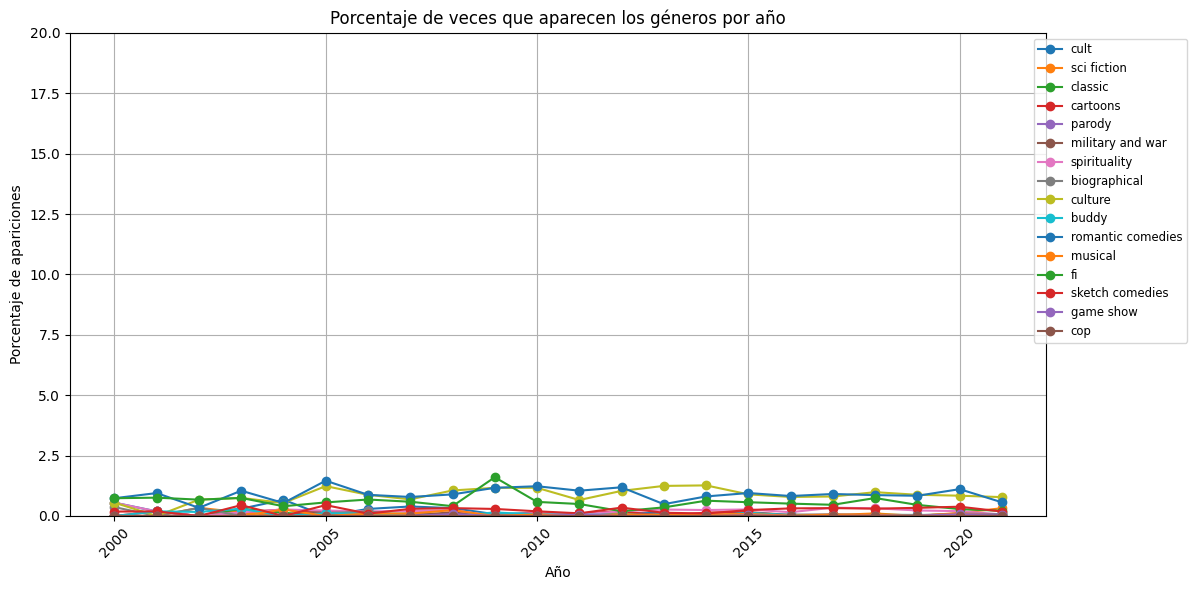

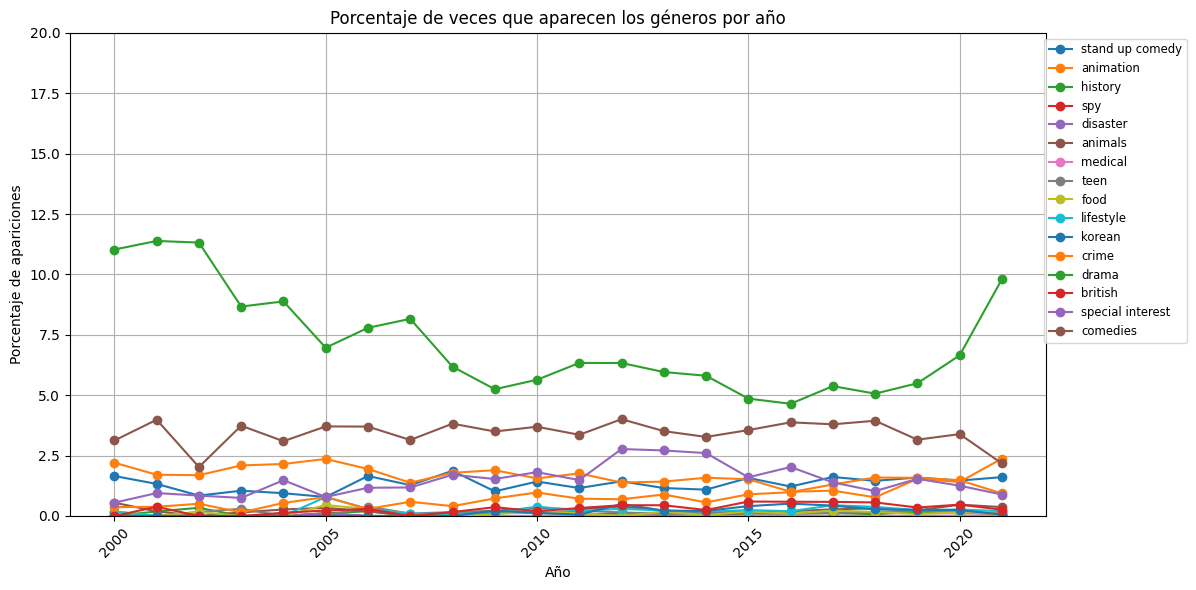

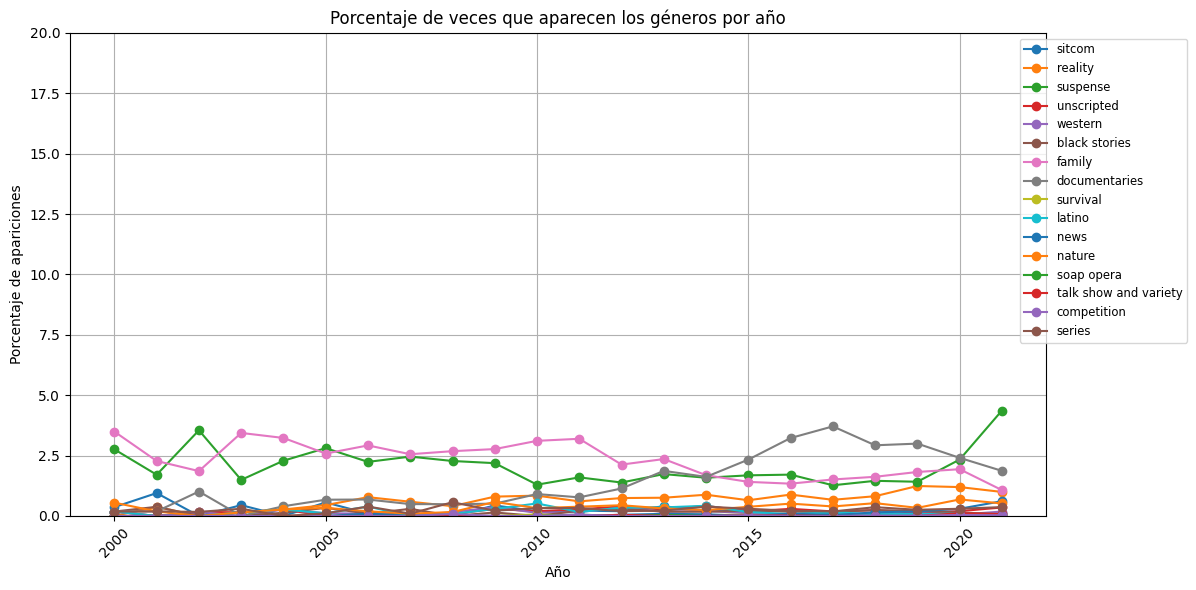

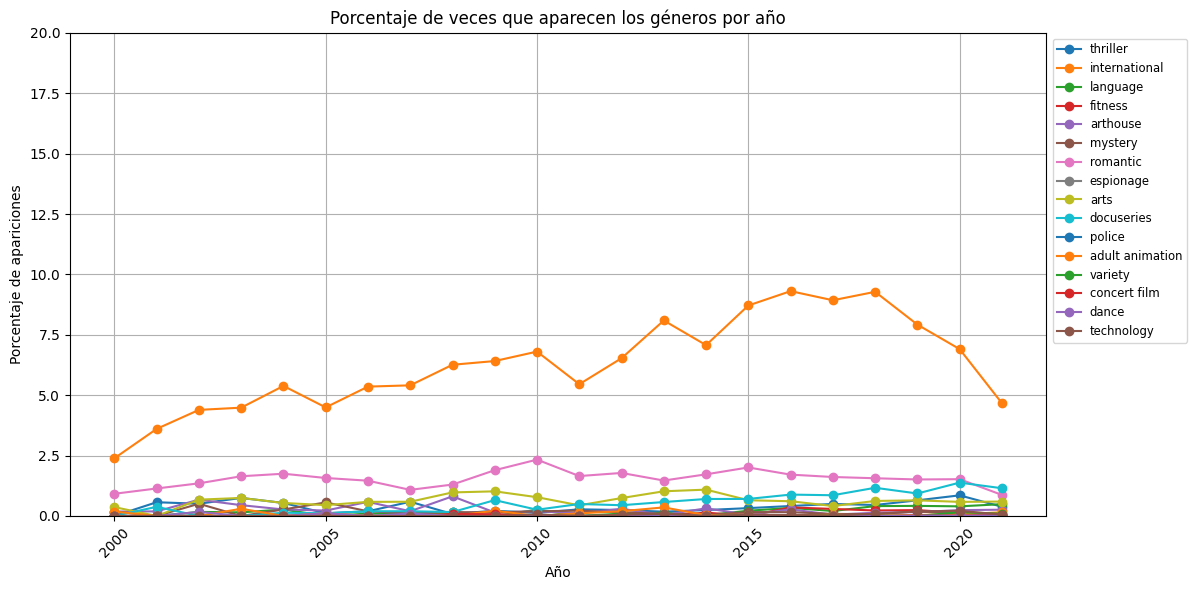

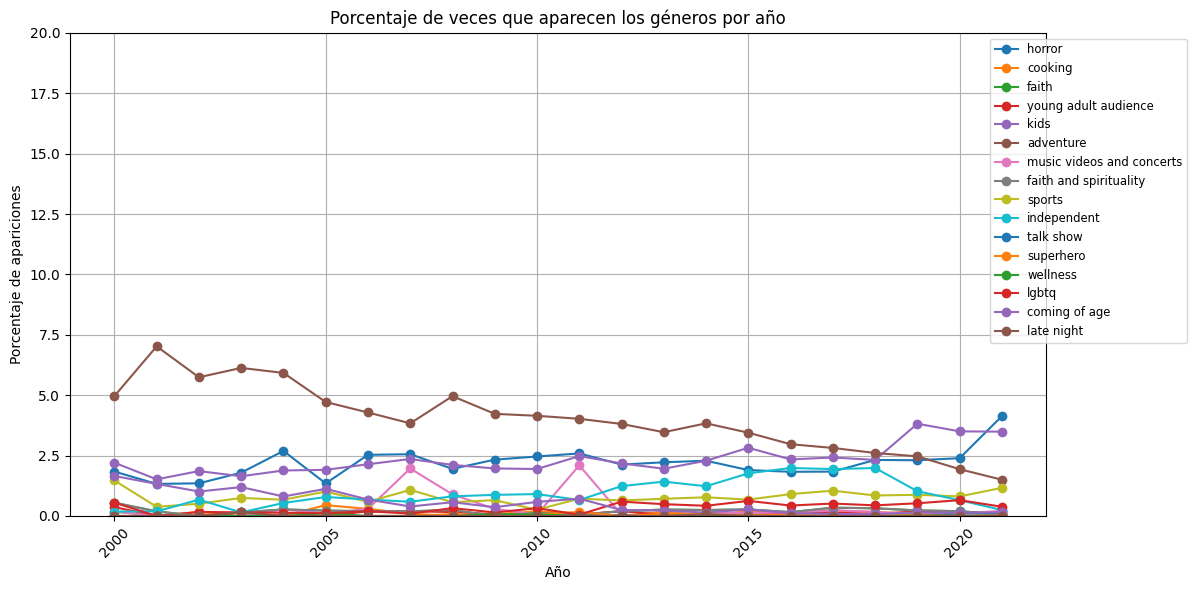

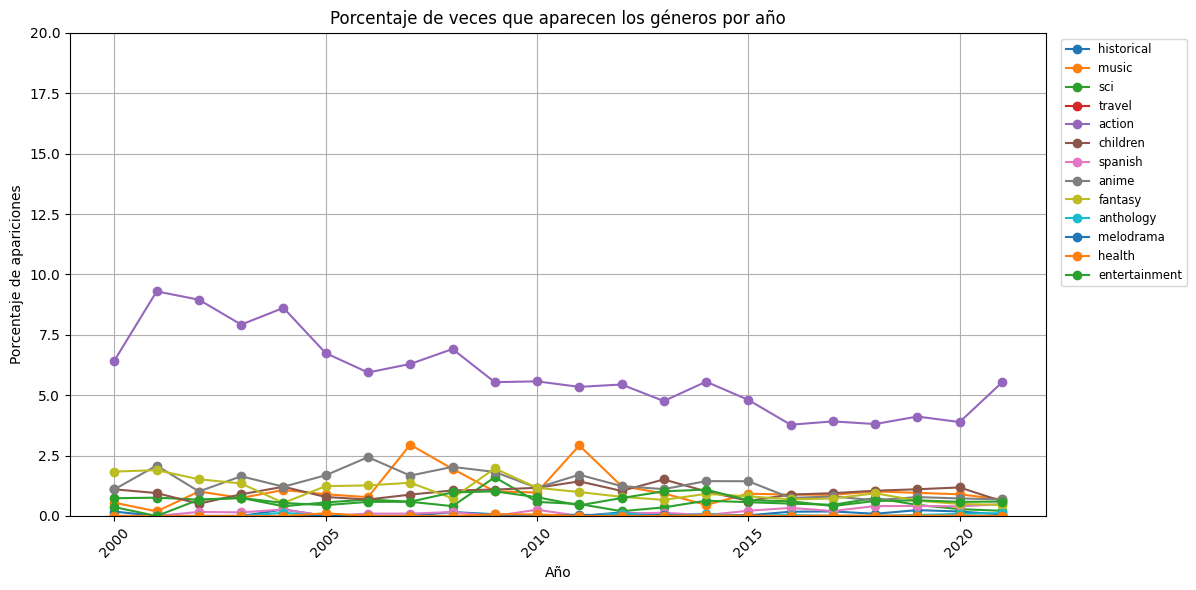

In [14]:

pivot_table = pd.pivot_table(df, index='release_year', aggfunc='sum')
pivot_table = pivot_table.apply(pd.to_numeric, errors='coerce')
total_por_año = pivot_table.sum(axis=1)
porcentaje_por_año = pivot_table.div(total_por_año, axis=0) * 100
porcentaje_filtrado = porcentaje_por_año[generos]
grupos_generos = [porcentaje_filtrado.columns[i:i+16] for i in range(0, len(porcentaje_filtrado.columns), 16)]
for grupo in grupos_generos:
    plt.figure(figsize=(12, 6))
    for column in grupo:
        plt.plot(porcentaje_filtrado.index, porcentaje_filtrado[column], marker='o', label=column)
    
    plt.title('Porcentaje de veces que aparecen los géneros por año')
    plt.xlabel('Año')
    plt.ylabel('Porcentaje de apariciones')
    plt.grid(True)
    plt.ylim([0, 20])  
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()




### Análisis Geoespacial de Preferencias de Contenido Audiovisual


El código proporcionado realiza un análisis geoespacial de las preferencias de contenido audiovisual a nivel mundial. A continuación, se explica paso a paso lo que hace cada parte del código:


1. **Inicialización de Variables:** Se crea un diccionario llamado __genero_por_pais__ que almacena el recuento de cada género de contenido por país, inicializándolo con valores de cero para cada género.


2. **Procesamiento del DataFrame:** Se recorre el DataFrame para contar los géneros de contenido audiovisual por país. Para cada fila del DataFrame, se verifica si el país tiene una marca (valor 1) y, si es así, se incrementa en uno el conteo del género correspondiente para ese país.


3. **Determinación del Género Más Común por País:** Se determina el género más común para cada país, seleccionando aquel con el recuento más alto.


4. **Creación del DataFrame de Géneros Máximos por País:** Se crea un DataFrame que contiene el país y su género de contenido más común.


5. **Mapeo de Nombres de Países:** Se aplica un mapeo de nombres de países para asegurar la coherencia con el conjunto de datos geoespaciales.


6. **Generación de Colores Aleatorios:** Se generan colores aleatorios para cada género de contenido.


7. **Añadir Colores al DataFrame:** Se añade una columna de colores al DataFrame de género máximo por país, asignando un color correspondiente a cada género.


8. **Lectura del Archivo Shapefile:** Se lee un archivo shapefile que contiene datos geoespaciales del mundo.


9. **Colorear los Países en el Mapa:** Se colorean los países en el mapa utilizando los colores asignados a los géneros máximos por país.


10. **Creación de una Leyenda:** Se crea una leyenda que muestra los géneros de contenido audiovisual y sus colores correspondientes.


En resumen, este código procesa el DataFrame que contiene información sobre la presencia de diferentes géneros de contenido audiovisual en cada país, y lo visualiza en un mapa del mundo coloreando cada país según su género de contenido más común y mostrando una leyenda para interpretar los colores.




C:\Users\USUARIO\AppData\Local\Temp\ipykernel_26012\1276543307.py:38: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



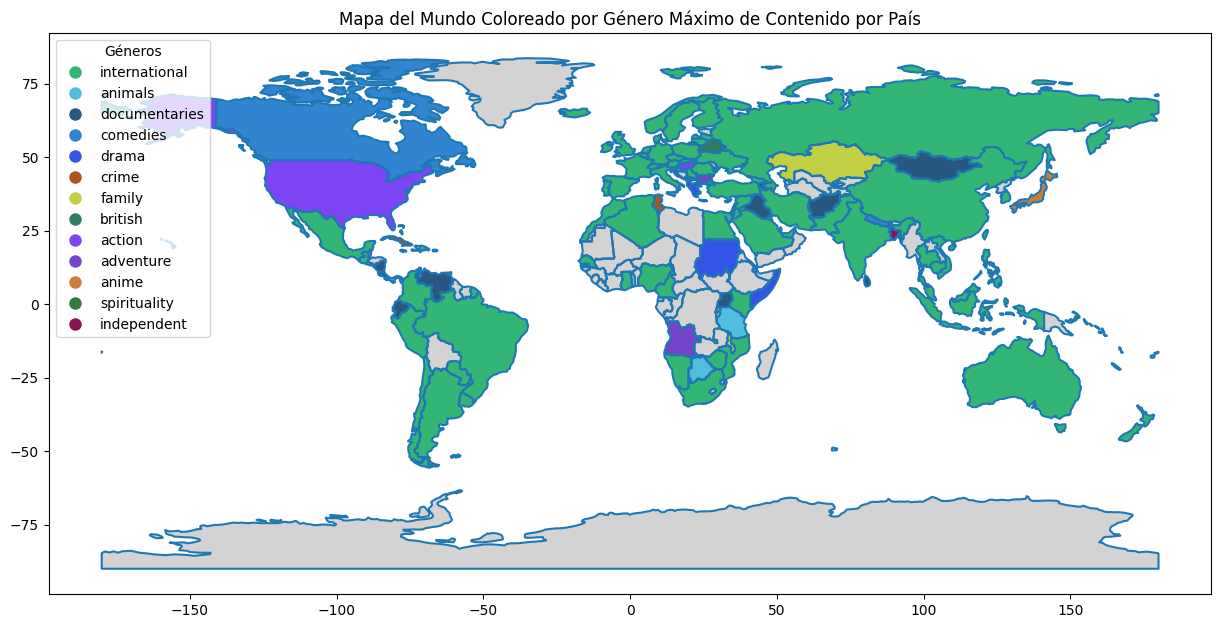

In [15]:

genero_por_pais = {pais: {genero: 0 for genero in generos} for pais in paises}

# Procesar el DataFrame para contar los géneros
for i, row in df.iterrows():
    for pais in paises:
        if row[pais] == 1:
            for genero in generos:
                if row[genero] == 1:
                    genero_por_pais[pais][genero] += 1

# Determinar el género más común para cada país
genero_maximo_por_pais = {}
for pais, conteo_generos in genero_por_pais.items():
    genero_maximo = max(conteo_generos, key=conteo_generos.get)
    genero_maximo_por_pais[pais] = genero_maximo

# Crear un DataFrame con los géneros máximos por país
df_genero_maximo = pd.DataFrame(list(genero_maximo_por_pais.items()), columns=['pais', 'genero_maximo'])

# Mapeo de nombres de países en el dataset geoespacial
mapeo_paises = {
    'United States': 'United States of America',
    'Dominican Republic': 'Dominican Rep.',
    'Czech Republic': 'Czechia',
}

# Aplicar el mapeo de nombres
df_genero_maximo['pais'] = df_genero_maximo['pais'].replace(mapeo_paises)

# Generar colores aleatorios para cada género
random.seed(42)  # Para reproducibilidad
colores = {genero: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for genero in generos}

# Añadir una columna de colores al DataFrame del género máximo
df_genero_maximo['color'] = df_genero_maximo['genero_maximo'].map(colores)

# Leer el archivo shapefile para los datos geoespaciales
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Colorear los países sin información en gris
world = world.merge(df_genero_maximo, how='left', left_on='name', right_on='pais')
world['color'] = world['color'].fillna('lightgrey')

# Filtrar los géneros y colores que se han pintado
generos_pintados = df_genero_maximo['genero_maximo'].unique()
colores_pintados = {genero: colores[genero] for genero in generos_pintados}

# Plotear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(ax=ax, color=world['color'])

# Crear una leyenda solo con los géneros pintados
handles = []
labels = []
for genero, color in colores_pintados.items():
    handles.append(plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(genero)
    
plt.legend(handles, labels, loc='upper left', title='Géneros')

plt.title('Mapa del Mundo Coloreado por Género Máximo de Contenido por País')
plt.show()



